In [1]:
library(partykit)
library(party)


Loading required package: grid

Loading required package: libcoin

Loading required package: mvtnorm

Loading required package: modeltools

Loading required package: stats4

Loading required package: strucchange

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Loading required package: sandwich


Attaching package: ‘party’


The following objects are masked from ‘package:partykit’:

    cforest, ctree, ctree_control, edge_simple, mob, mob_control,
    node_barplot, node_bivplot, node_boxplot, node_inner, node_surv,
    node_terminal, varimp




In [2]:
particulate = read.csv("./particulate.csv", header = TRUE, sep = ",")
attach(particulate)
names(particulate)

[1] "idStudy"          "idIstat"          "Province"         "itCode"          
 [5] "Exceedances"      "StationsNum"      "Cases"            "Population"      
 [9] "Density"          "Long"             "Lat"              "Where"           
[13] "Commuters"        "CommutersDensity" "ExcedRatio25"

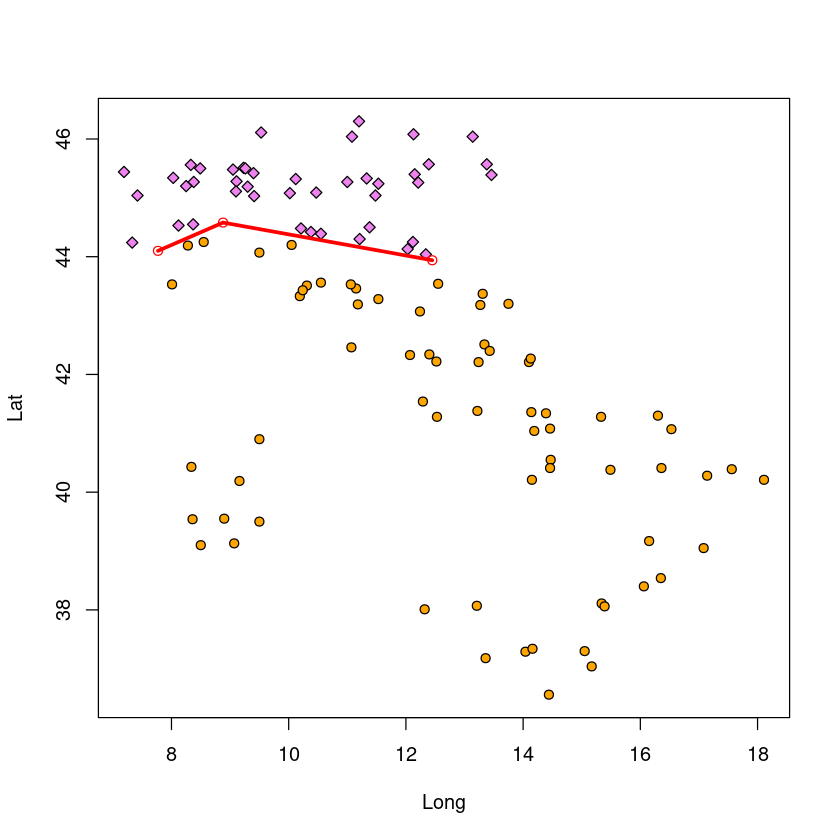

In [3]:
ormea = c(7.77, 44.1)
fraconalto = c(8.88, 44.58)
sanmarino =c(12.45, 43.94)
plot(Long, Lat, col = "white")
points(ormea[1], ormea[2], col = "red")
points(fraconalto[1], fraconalto[2], col = "red")
confineLon = c(ormea[1], fraconalto[1], sanmarino[1])
confineLat = c(ormea[2], fraconalto[2], sanmarino[2])
points(Long[Where == "north"], Lat[Where == "north"], bg = "violet", pch = 23)
points(Long[Where == "south"], Lat[Where == "south"], bg = "orange", pch = 21)
lines(confineLon, confineLat, col = "red", lwd = 3)
points(sanmarino[1], sanmarino[2], col = "red")


In [4]:
### To calculate the ratio of PM10 Exceedances over the StationsNum removing null denominator
ExcedRatioPM10 = Exceedances / StationsNum
ExcedRatioPM10[ExcedRatioPM10 == "NaN"] = 0
summary(ExcedRatioPM10)


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  0.000   0.000   0.400   2.456   5.586  11.286       3 

In [5]:
### To define the primary outcome of the study, 
### as in Crawley, Chapter 14 'Proportion data' 
### https://onlinelibrary.wiley.com/doi/book/10.1002/9781119941750
response = cbind(Cases, Population - Cases)



	 Conditional inference tree with 5 terminal nodes

Response:  Cases 
Inputs:  ExcedRatioPM10, Density 
Number of observations:  110 

1) ExcedRatioPM10 <= 6.666667; criterion = 1, statistic = 32.555
  2) ExcedRatioPM10 <= 1.285714; criterion = 0.999, statistic = 12.401
    3) Density <= 284; criterion = 1, statistic = 24.988
      4) ExcedRatioPM10 <= 0.3636364; criterion = 0.976, statistic = 6.307
        5)*  weights = 51 
      4) ExcedRatioPM10 > 0.3636364
        6)*  weights = 9 
    3) Density > 284
      7)*  weights = 8 
  2) ExcedRatioPM10 > 1.285714
    8)*  weights = 23 
1) ExcedRatioPM10 > 6.666667
  9)*  weights = 19 


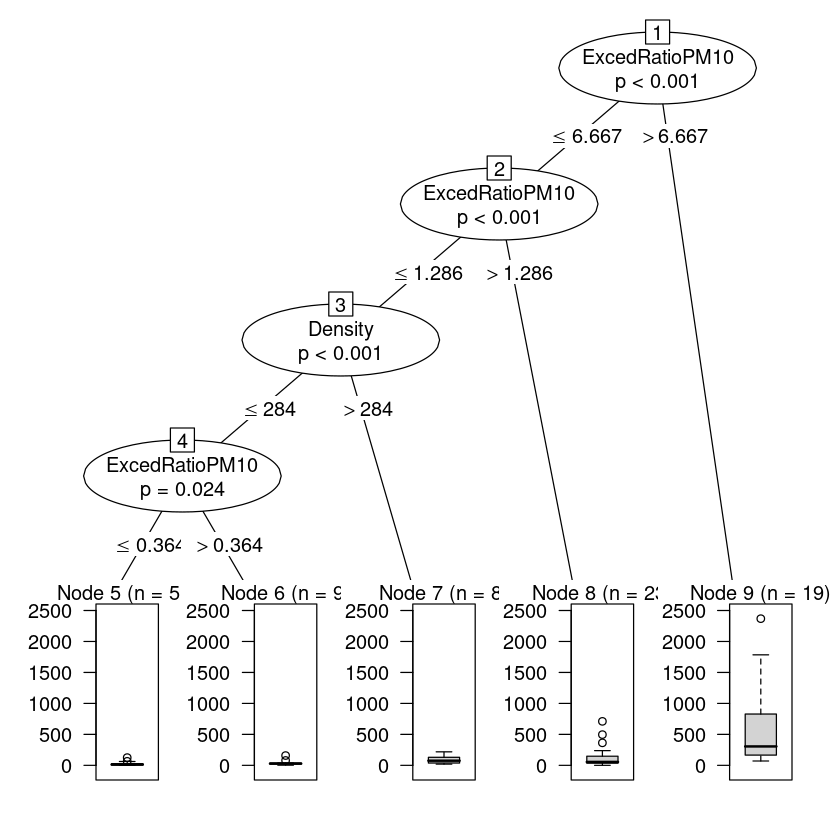

In [12]:
### RESULTS 
### In the univariate analysis, the PM10 daily limit value exceedances appear to be a 
### significant predictor (p < .001) of infection (Fig. 3b) with a 1.29 cut-off value. 
### The cut-off divides the Provinces into two classes, respectively with higher (n = 43) 
### and lower (n = 67) PM10 concentrations. 
### [unpublished]
### the 1.29 cut-off value comes from exploratory analysis:
preliminaryexploration = Cases ~ ExcedRatioPM10 + Density
ct1 = ctree(preliminaryexploration)
print(ct1)
plot(ct1)

#il valore 1.29 direi che e' stato selezionto da questa prima ctree 
#infatti lo splitting viene fuori appunto ad 1.28.... 

  [1] lowerPM10  higherPM10 lowerPM10  lowerPM10  lowerPM10  lowerPM10 
  [7] lowerPM10  higherPM10 lowerPM10  lowerPM10  higherPM10 higherPM10
 [13] higherPM10 lowerPM10  higherPM10 lowerPM10  higherPM10 lowerPM10 
 [19] <NA>       lowerPM10  lowerPM10  higherPM10 lowerPM10  lowerPM10 
 [25] lowerPM10  higherPM10 higherPM10 higherPM10 lowerPM10  lowerPM10 
 [31] lowerPM10  lowerPM10  higherPM10 higherPM10 lowerPM10  lowerPM10 
 [37] lowerPM10  lowerPM10  lowerPM10  higherPM10 lowerPM10  <NA>      
 [43] higherPM10 lowerPM10  higherPM10 lowerPM10  lowerPM10  higherPM10
 [49] lowerPM10  lowerPM10  higherPM10 lowerPM10  lowerPM10  higherPM10
 [55] higherPM10 higherPM10 lowerPM10  lowerPM10  higherPM10 higherPM10
 [61] lowerPM10  lowerPM10  lowerPM10  lowerPM10  lowerPM10  higherPM10
 [67] higherPM10 lowerPM10  lowerPM10  lowerPM10  higherPM10 lowerPM10 
 [73] higherPM10 lowerPM10  higherPM10 higherPM10 lowerPM10  higherPM10
 [79] lowerPM10  higherPM10 lowerPM10  lowerPM10  lowerPM10  hig

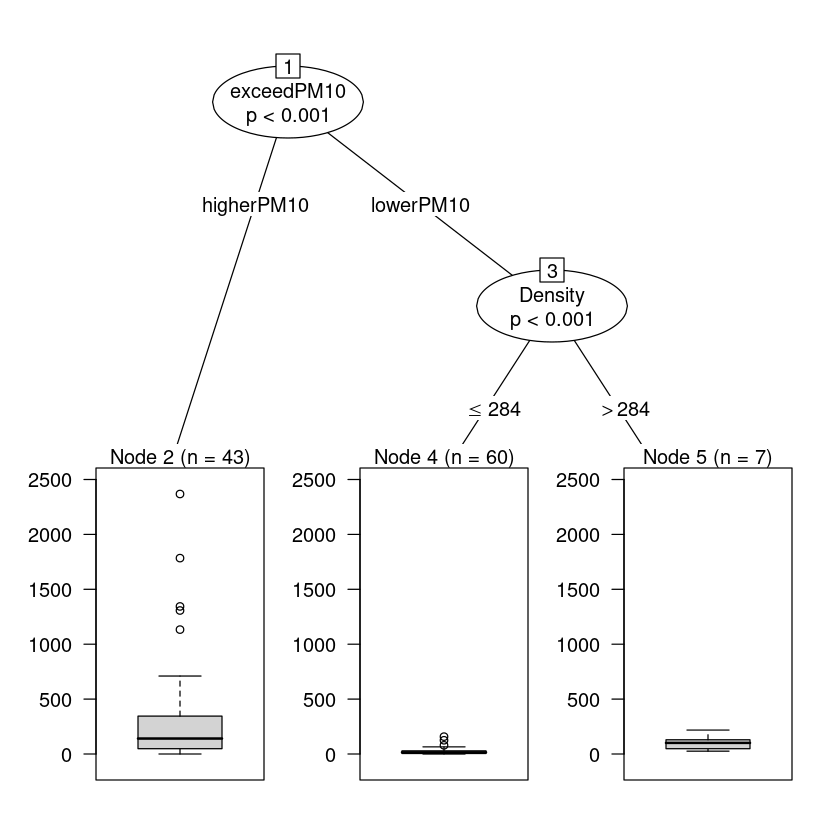

In [8]:
exceedPM10 = factor(ExcedRatioPM10 > 1.285714)
levels(exceedPM10)[2] = "higherPM10"
levels(exceedPM10)[1] = "lowerPM10"
print(exceedPM10)
print(Cases)
preliminaryexploration2 = Cases ~ exceedPM10 + Density
ct = ctree(preliminaryexploration2)

print(ct)
plot(ct)
### [unpublished]
### boxplot appears 'long tailed', log tansform may help in seeing

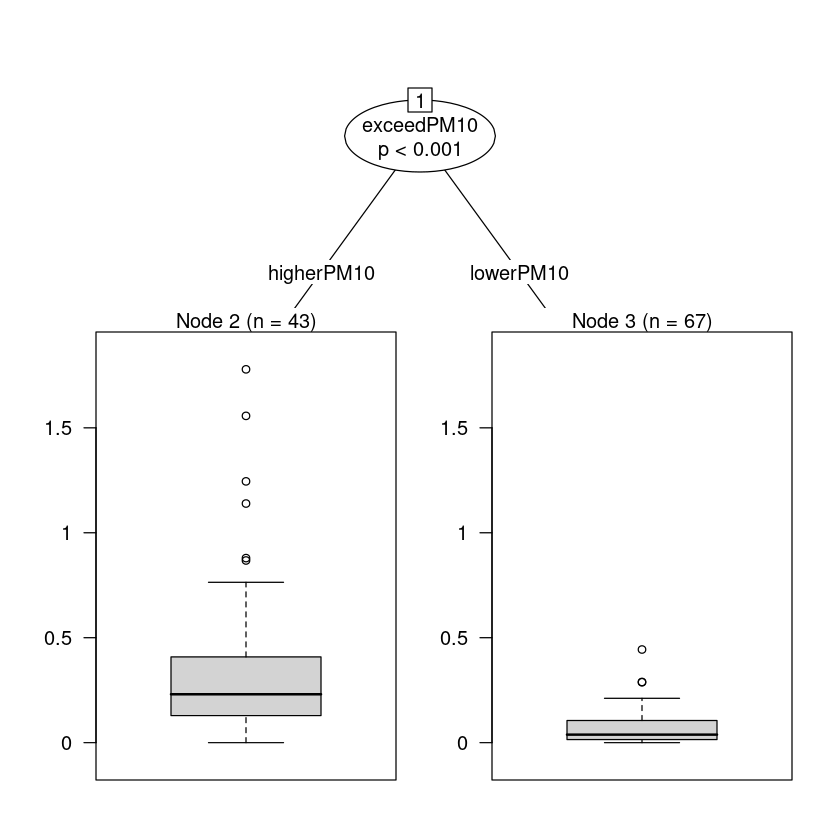

In [9]:
### figure previous3b
CasesProp = 1000 * Cases/Population
LogCasesProp = log(1+ CasesProp)
startrelation = LogCasesProp ~ exceedPM10 
Figure3B = ctree(startrelation)
plot(Figure3B)
### [unpublished figure] 
### same without log transform 
### plot(ctree(CasesProp ~ exceedPM10))


In [10]:
### the less polluted Provinces had a median 0.03 infection case over 1000 residents 
### (first - third quartile 0.01 - 0.09, range 0.00 - 0.56), while most polluted Provinces
### had a median 0.26 infection cases over 1000 Province residents 
### (first - third quartile 0.14 - 0.51, range 0.00 - 4.92).
summary(CasesProp[exceedPM10 == "lowerPM10"])
summary(CasesProp[exceedPM10 == "higherPM10"])


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
0.00000 0.01431 0.03413 0.07435 0.09401 0.55865       3 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
 0.0000  0.1377  0.2595  0.6188  0.5056  4.9219       3 

            Where
exceedPM10   north south
  lowerPM10      2    62
  higherPM10    39     4


	Fisher's Exact Test for Count Data

data:  table(exceedPM10, Where)
p-value < 2.2e-16
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
 0.0003270617 0.0219412136
sample estimates:
 odds ratio 
0.003854819 


[1] 51

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.00000 0.01328 0.03010 0.04934 0.05277 0.33354 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.1285  0.1831  0.4993  0.3621  4.9219 

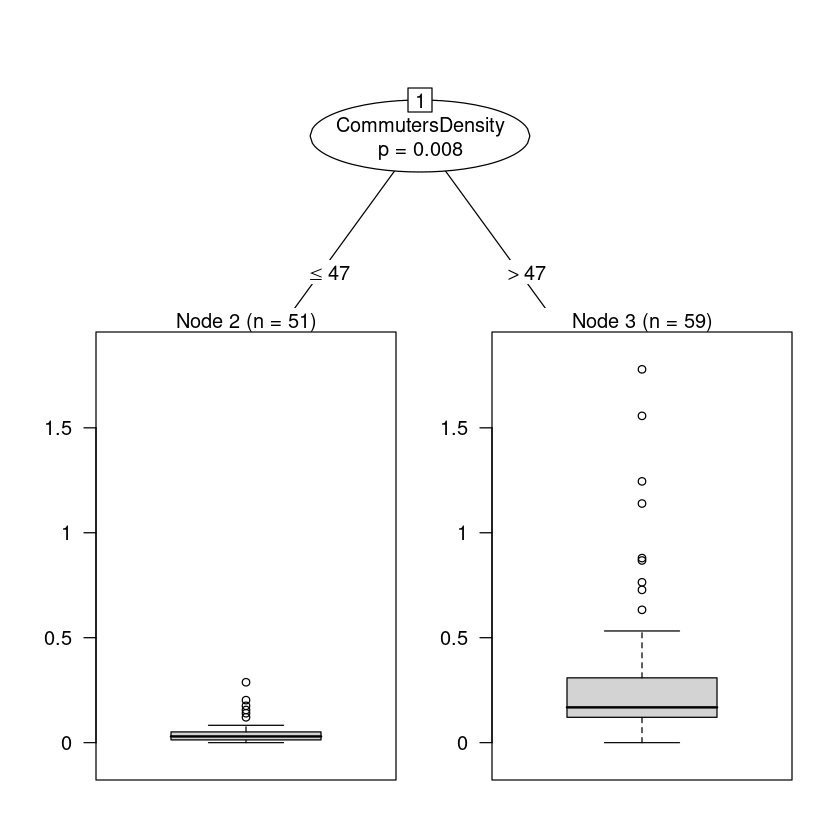

Warning message in xy.coords(x, y, xlabel, ylabel, log):
“4 y values <= 0 omitted from logarithmic plot”


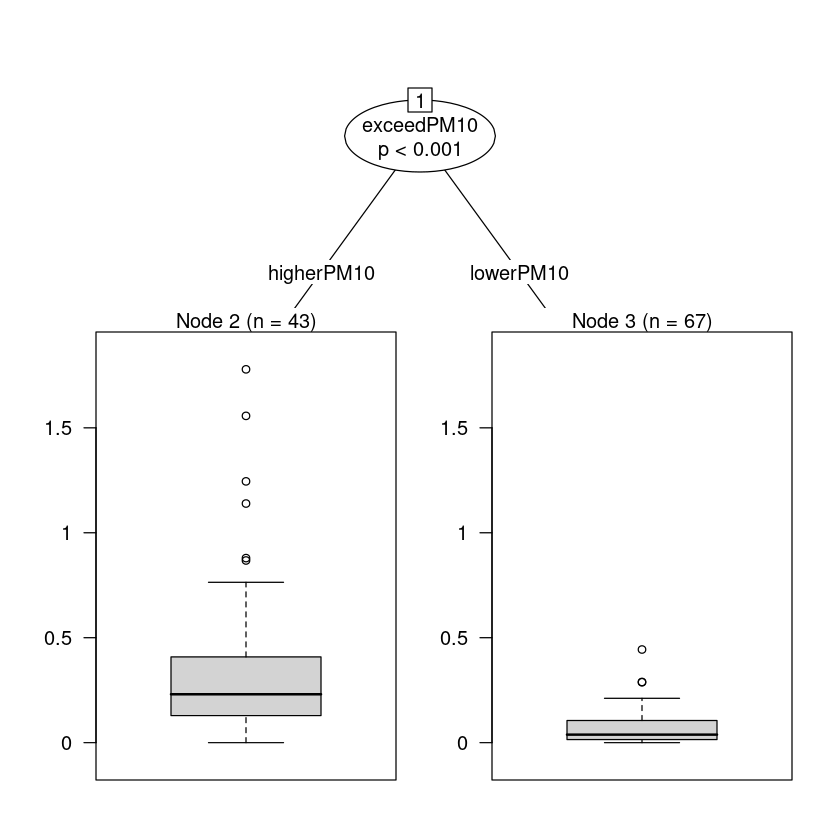

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),-9.4538281,0.32088345,-29.461876,1.416064e-52
ExcedRatioPM10,0.2514251,0.04327051,5.810542,6.738602e-08


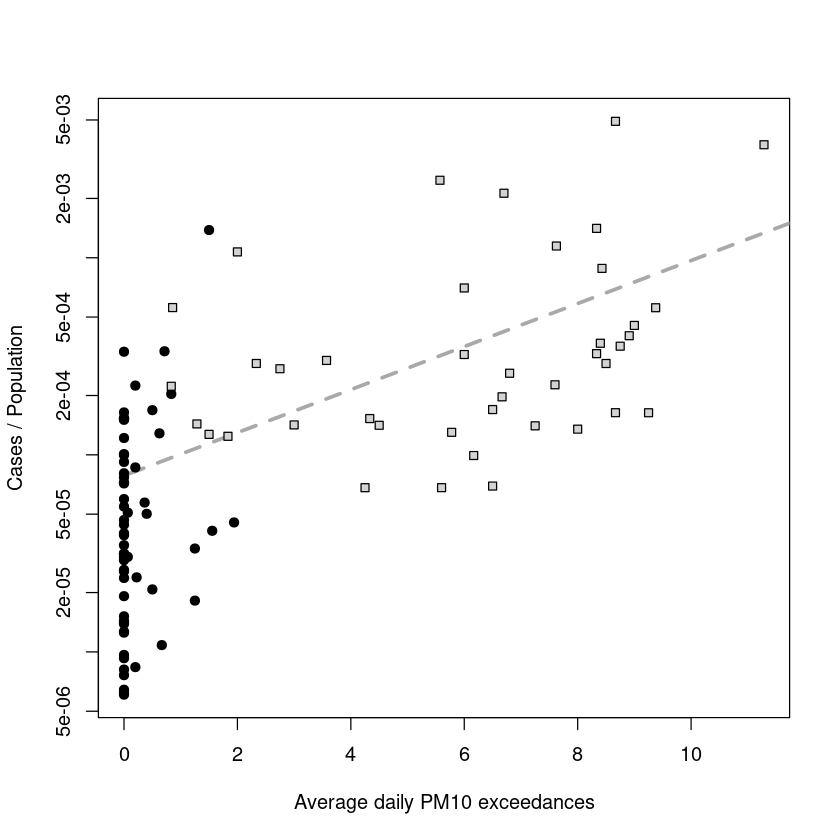


Call:
lm(formula = ExcedRatio25 ~ ExcedRatioPM10)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.7771 -1.0592 -0.6134  0.9425  4.2623 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)     1.05922    0.31396   3.374  0.00126 ** 
ExcedRatioPM10  1.37819    0.06229  22.126  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.822 on 64 degrees of freedom
  (44 observations deleted due to missingness)
Multiple R-squared:  0.8844,	Adjusted R-squared:  0.8826 
F-statistic: 489.6 on 1 and 64 DF,  p-value: < 2.2e-16



	Pearson's product-moment correlation

data:  ExcedRatioPM10 and ExcedRatio25
t = 22.126, df = 64, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.9041915 0.9632129
sample estimates:
      cor 
0.9404192 


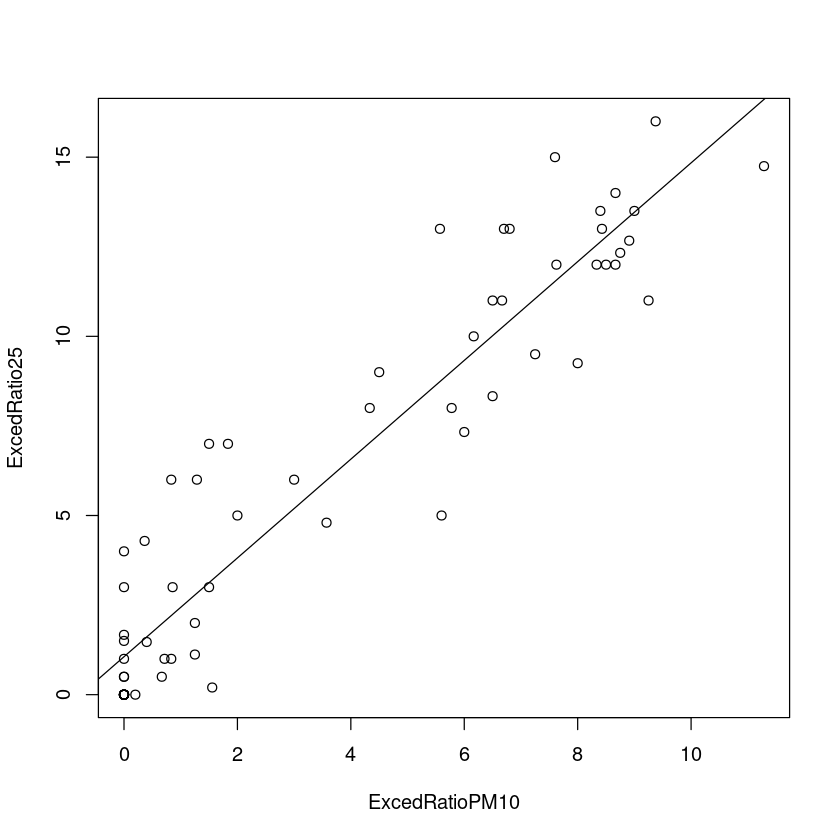

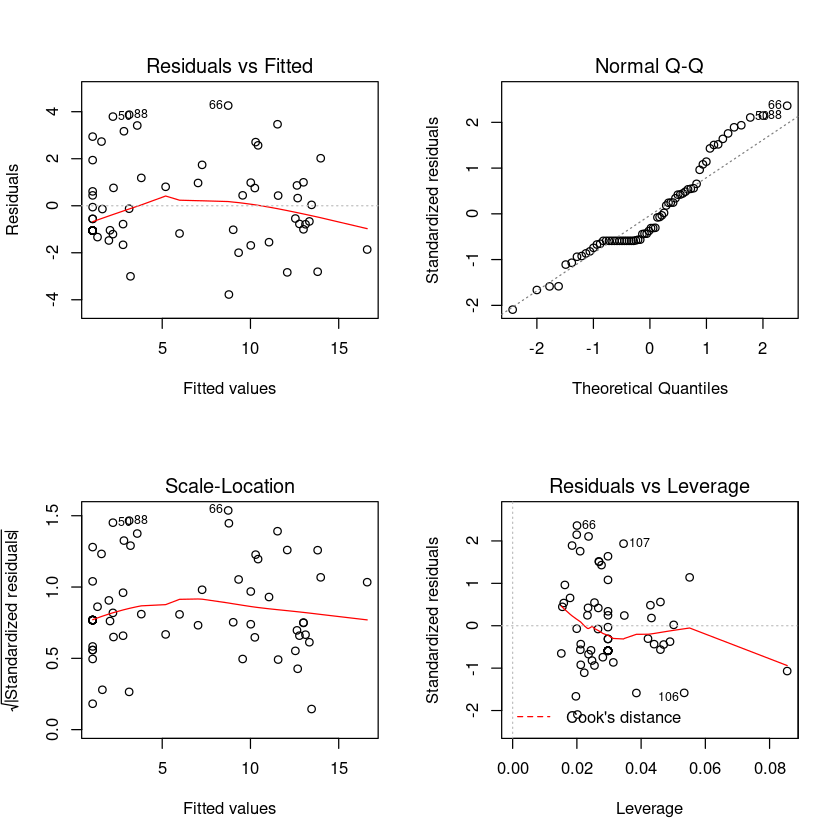

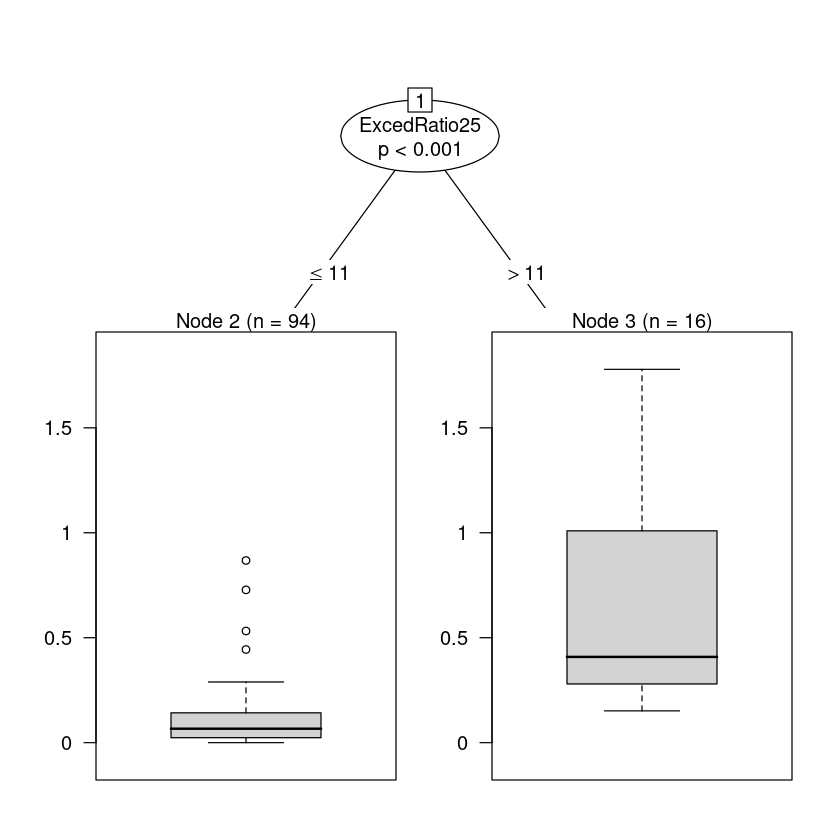

lowerPM2.5 higherPM2.5        NA's 
         51          16          43

[1] 110

lowerPM2.5 higherPM2.5        NA's 
  0.4636364   0.1454545   0.3909091

                  Where
threelevelsclass   north south
  lowbothPM            2    28
  highPM10lowPM2.5    18     2
  highbothPM          16     0

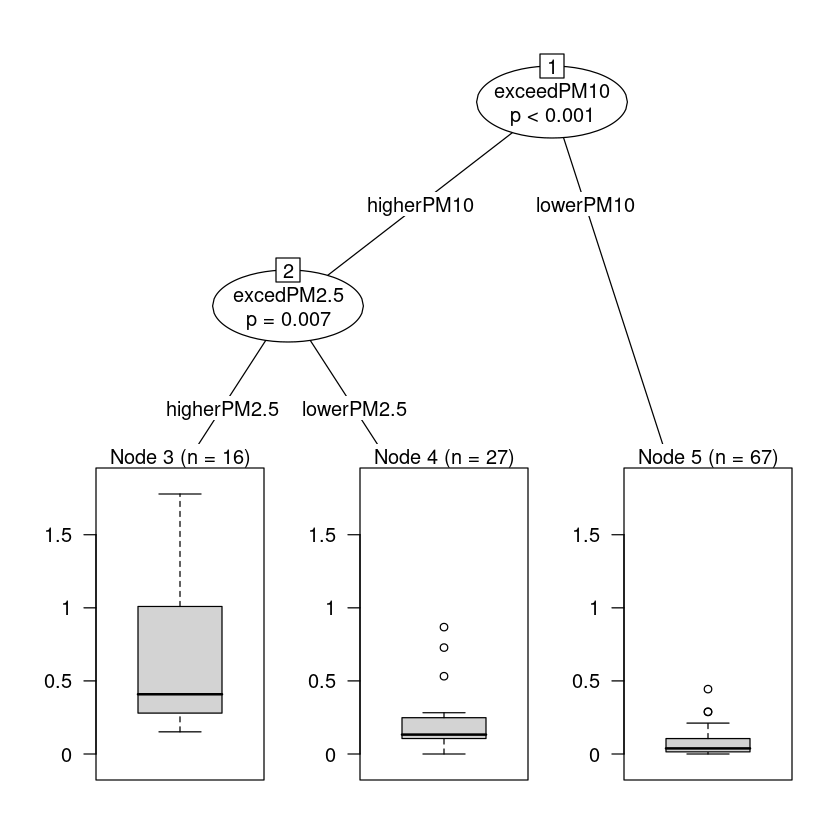

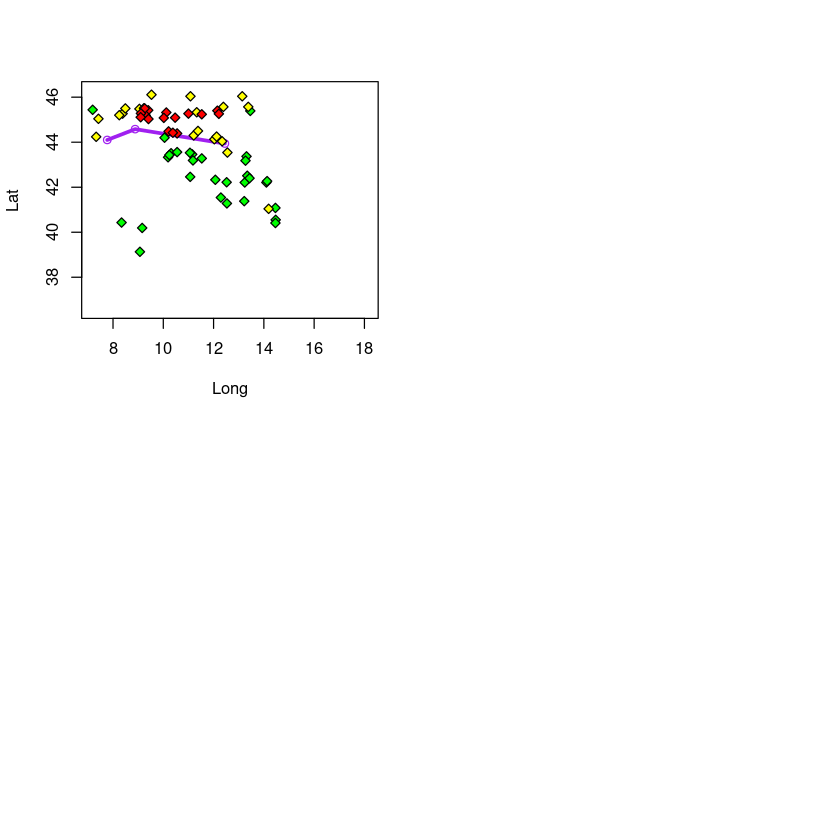

In [11]:
## Dividing the Italian peninsula into two areas, the Northern and Southern part along
### the Tuscan-Emilian Apennines watershed, the exceedPM10 results as follows: 
### 39 of the 41 Northern Provinces falls in the higher PM10 category, while on the 
### Southern Provinces the ratio is reversed: 62 over 66 have lower PM10 
### (odds ratio .00, Fisher exact test p < .001).
table(exceedPM10, Where)
fisher.test(table(exceedPM10, Where))



### Also the proportion of commuters over the Province population has a significant 
### (p = 0.01, not depicted) role in predicting the infection rates according to the 
### univariate binary partitioning tree analysis: after setting a cut-off of 47% ... 
withoutPM = LogCasesProp ~ Population + Density + Commuters + CommutersDensity
plot(ctree(withoutPM))  ## important: Density is not anymore a predictor


### ... people daily moving in Provinces, in the Provinces 
### with a lower number of commuters (n = 51) ... 
sum(CommutersDensity <= 47)


### ... the median infection case over 1000 Province residents is 0.03 
### (first – third quartile 0.01 – 0.05, range 0.00 – 0.33), while in the other Provinces
### the median infection cases over 1000 residents is 0.18 
### (first – third quartile 0.13 – 0.36, range 0.00 – 4.92).
summary(CasesProp[CommutersDensity <= 47])
summary(CasesProp[CommutersDensity > 47])

### Notably, when performing a bivariate conditional regression exploratory analysis 
### joining both the pollution and the proportion of commuters as possible predictors 
### of the infection rates, one obtains exactly the same tree depicted in Fig. 3b: 
### the commuters proportion looses its effect, suggesting a strong correlation of 
### air quality to the COVID-19 cases percentages breakout.
bivariate = LogCasesProp ~ exceedPM10 + CommutersDensity
plot(ctree(bivariate))  
### same as: 
### plot(Figure3B)


### The logistic regression depicted in Fig. 3A (semi-logarithmic scales)
### confirms the exploratory analysis:
plot(ExcedRatioPM10, Cases/Population, log = "y", col = "white",  pch = "." ,
                xlab = "Average daily PM10 exceedances", ylab = "Cases / Population")
minimaladequate = glm(response ~ ExcedRatioPM10, family = quasibinomial)
xx = seq(from = 0.1, to = 12, by = 0.01)
ip = minimaladequate$coef[[1]] + minimaladequate$coef[[2]] * xx 
yy = exp(ip)/(1+exp(ip))
lines(xx, yy, lty = 2, col = "darkgray", lwd = 3)
points(ExcedRatioPM10[Where == "south"], Cases[Where == "south"]/Population[Where == "south"],
                col = "black", bg = "black",  pch = 21)
points(ExcedRatioPM10[Where == "north"], Cases[Where == "north"]/Population[Where == "north"],
                col = "black", bg = "lightgray",  pch = 22)

### ... a binomial distributed generalized linear model, corrected for overdispersion, 
### reveals an increasing slope of 0.25 (s.e. 0.04, p < 0.001) of the linear predictor. 
summary(minimaladequate)$coef


### after Reviewers revision, May/June 2020
### Correlation between Province PM2.5 and PM10 exceedance rates has been assessed
linearmodel = lm(ExcedRatio25 ~ ExcedRatioPM10)
plot(ExcedRatioPM10, ExcedRatio25)
abline(linearmodel)
summary(linearmodel)
cor.test(ExcedRatioPM10, ExcedRatio25, na.rm = TRUE)


### [unpublished]
### diagnostic plots indicates mild lack of normality into residuals
### possible explanation: two different clusters
par(mfrow = c(2,2))
plot(linearmodel)

### Repeating exploratory analysis on PM2.5 exceedance rates by 
### recursive partitioning tree analysis, an 11 cutoff was detected ...
monovariatePM25 = LogCasesProp ~  ExcedRatio25 
plot(ctree(monovariatePM25))  
excedPM2.5 = factor(ExcedRatio25 > 11)
levels(excedPM2.5)[2] = "higherPM2.5"
levels(excedPM2.5)[1] = "lowerPM2.5"


### ...  and an improved tree was disclosed, as depicted in Figure 3C.
Relation3C = LogCasesProp ~ exceedPM10 + excedPM2.5 + CommutersDensity
Figure3C = ctree(Relation3C)
plot(Figure3C)


###  Despite the limitation of not having 43 over 110 complete data on PM2.5 exceedances 
### (39% missing values) ... 
summary(excedPM2.5)
length(excedPM2.5)
summary(excedPM2.5)/length(excedPM2.5)
threelevelsclass = factor(as.numeric(exceedPM10) * as.numeric(excedPM2.5))
levels(threelevelsclass)[1] = "lowbothPM"
levels(threelevelsclass)[2] = "highPM10lowPM2.5"
levels(threelevelsclass)[3] = "highbothPM"

### it appears that, coherently with main study outcome, 
### strong PM2.5 exceedance rates are eminently located in Po Valley. 
### [unpublished Figure]
ormea = c(7.77, 44.1)
fraconalto = c(8.88, 44.58)
sanmarino =c(12.45, 43.94)
plot(Long, Lat, col = "white")
points(ormea[1], ormea[2], col = "purple")
points(fraconalto[1], fraconalto[2], col = "purple")
points(sanmarino[1], sanmarino[2], col = "purple")
confineLon = c(ormea[1], fraconalto[1], sanmarino[1])
confineLat = c(ormea[2], fraconalto[2], sanmarino[2])
lines(confineLon, confineLat, col = "purple", lwd = 3)
points(Long[threelevelsclass == "lowbothPM"], 
                Lat[threelevelsclass == "lowbothPM"], bg = "green", pch = 23)
points(Long[threelevelsclass == "highPM10lowPM2.5"], 
                Lat[threelevelsclass == "highPM10lowPM2.5"], bg = "yellow", pch = 23)
points(Long[threelevelsclass == "highbothPM"], 
                Lat[threelevelsclass == "highbothPM"], bg = "red", pch = 23)


### The following table depicts in detail the situation:
table(threelevelsclass, Where)
